The following code provides descriptive and inferential statistical analysis, preliminary feature engineering and visualization of the training dataset.

Statistical method involved:
- descriptive statistics: mean, min, max, percentile, bar plot, box plot, histogram, scatter plot
- inferential statistics: two sample t test, ANOVA (F-test)

In [1]:
%matplotlib inline
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Upload data

In [2]:
train = pd.read_json('train.json')
test = pd.read_json('test.json')

### Data analysis & Feature Engineering

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [4]:
train.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street


#### 1. Interest Level
There's no missing value in 'interest_level'.

In [5]:
train['interest_level'].value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

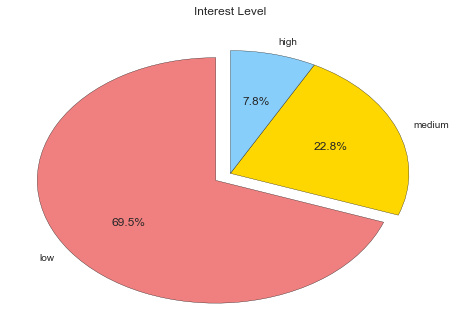

In [6]:
# data to plot
labels = ['low', 'medium', 'high']
sizes = train.interest_level.value_counts().values
explode = [0.1, 0, 0]
colors = ['lightcoral','gold','lightskyblue']

# plot
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%",
                        startangle = 90)
plt.title('Interest Level')
plt.show()

#### 2. manager_id, listing_id, building_id 
I'm not sure how these features will help with classification. Let's take a look at these features.

'manager_id'

In [7]:
train['manager_id'].value_counts()

e6472c7237327dd3903b3d6f6a94515a    2533
6e5c10246156ae5bdcd9b487ca99d96a     711
8f5a9c893f6d602f4953fcc0b8e6e9b4     410
62b685cc0d876c3a1a51d63a0d6a8082     402
cb87dadbca78fad02b388dc9e8f25a5b     373
9df32cb8dda19d3222d66e69e258616b     330
b7de4cb395920136663132057fa89d84     320
2aa9bfa5f67ed9997ea341dee8a3a271     316
ad3d8ddc52c7e0859b5c6c7f7949c3bd     305
c9c33695ee2a2f818e9f1d8f7d1c4b39     299
1fb46c4a72bcf764ac35fc23f394760d     289
d2bce61e0e0079ebdc8c281e415e045b     276
5599e962719af3ccc2976855c2d5893c     256
aa9e353a6b43b125cbc89cb751090a9e     246
62826f3ae01f2ddc93b9cd28c659ab2b     233
8b53ccf4338806ab1be3dd0267711649     222
612a00076aefe8c98d1df4835640c74b     214
dbbb6b990661b1e507a387f019bcb1a0     212
b209e2c4384a64cc307c26759ee0c651     210
8262449f40e9117f7a9ea49b4a333993     210
fc81b75568d3655a922523cb0d77ea5b     206
d1737922fe92ccb0dc37ba85589e6415     198
1067e078446a7897d2da493d2f741316     191
02e17b21a1814fb10336b2ee8ceb3e79     170
501b52559fd21b32

In [8]:
len(train['manager_id'].value_counts())

3481

49352 entries only contains 3481 manager_id and many manager_id are related to more than one postings.
Let's figure out these high profile managers.

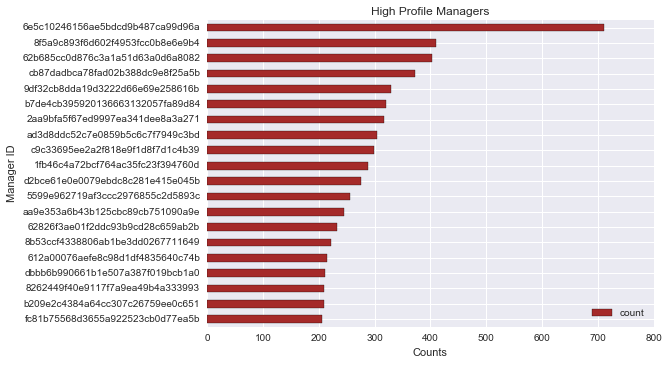

In [9]:
manager = train.groupby(['manager_id'])['manager_id'].count().fillna(0) # return pandas series
managerDF = pd.DataFrame({'manager_id':manager.index, 'count':manager.values})
managerDF = managerDF[(managerDF['count'] > 200) & (managerDF['manager_id'] != 'e6472c7237327dd3903b3d6f6a94515a')]
managerDF.sort_values("count",inplace=True)

managerDF.plot(x = 'manager_id', y = 'count', kind='barh',color="brown")
plt.title("High Profile Managers")
plt.xlabel("Counts")
plt.ylabel("Manager ID")

building_id

In [10]:
train['building_id'].value_counts()

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
f68bf347f99df026f4faad43cc604048     191
c94301249b8c09429d329864d58e5b82     167
ce6d18bf3238e668b2bf23f4110b7b67     165
57ef86c28a8ae482dc3a3c3af28e8e48     159
128d4af0683efc5e1eded8dc8044d5e3     153
d0234abbc01a982d54e8d446acc03405     152
9c18bf871b97492b96d8ddb800591f1b     147
cb14c4f807f23ecee1f7469b5159d2de     141
8e3b8c607c3edcf3de131c24f0390179     141
ea9045106c4e1fe52853b6af941f1c69     139
7967a1280bf3f7644500fc79d2696b0e     133
a01c99eb2cfdde327e1691e17d6696ba     131
093f64f52a6e43ba5e8f12bec8200554     128
18f6eb16d2f3e9885cb4a5d0a40791c6     127
5565db9b7cba3603834c4aa6f2950960     126
dd7b281c0dbafc8b53575ab78cca75d4     125
3a956bd42c50f06ac84cf072fc514f5f     123
6ce872b483cfcbb32ea805604d44ef5f     120
ec12b4db154a9c75983f5e32edd93843     116
aed67db466854ec2

In [11]:
len(train['building_id'].value_counts())

7585

49352 entries only contains 7585 building_id and multiple listing share one building_id, as seen in counts.

Let's figure out these high profile buildings.

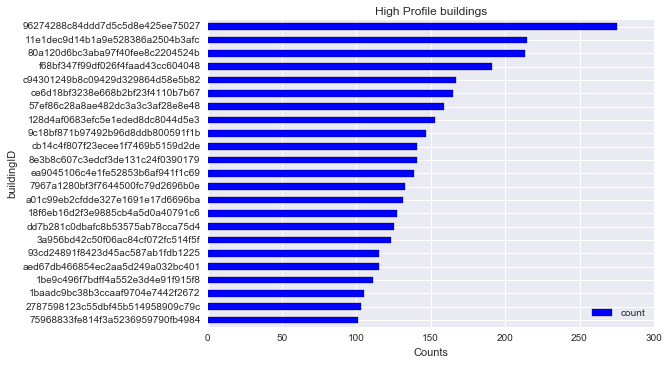

In [12]:
building = train.groupby(['building_id'])['building_id'].count().fillna(0) # return pandas series
buildingDF = pd.DataFrame({'building_id':building.index, 'count':building.values})
buildingDF = buildingDF[(buildingDF['count'] > 100) & buildingDF['count'] != 0].copy()
buildingDF.sort_values("count",inplace=True)

buildingDF.plot(x = 'building_id', y = 'count', kind='barh',color="blue")
plt.title("High Profile buildings")
plt.xlabel("Counts")
plt.ylabel("buildingID")

'listing_id'

In [13]:
train['listing_id'].value_counts()

6819838    1
6975823    1
7179515    1
6921019    1
7183609    1
7116024    1
7073015    1
7070966    1
6880501    1
7209390    1
7068913    1
6935792    1
7036421    1
6831341    1
7215861    1
6819051    1
7144682    1
7000467    1
6909159    1
7224864    1
6976740    1
6992360    1
7099616    1
6927612    1
7232761    1
6837504    1
7193874    1
6923550    1
7189788    1
6851867    1
          ..
6910523    1
7207369    1
7233886    1
6974008    1
7017015    1
7151065    1
7002702    1
7289040    1
7232094    1
7141994    1
7099172    1
6993926    1
6918759    1
6920806    1
7176805    1
6978585    1
7060066    1
7084323    1
7225949    1
6869583    1
7219862    1
7172699    1
7234137    1
7105112    1
6820439    1
6822486    1
6838148    1
6818388    1
7006764    1
7143424    1
Name: listing_id, dtype: int64

In [14]:
len(train['listing_id'].value_counts())

49352

49352 entries only contains 49352 listing_id. That means each listing contains one unique listing_id, as seen in counts.

#### 3. Lattitude & Longitude -- delete outliers, clustering into 15 groups

Let's first visualize the location distribution of these rental apartments.

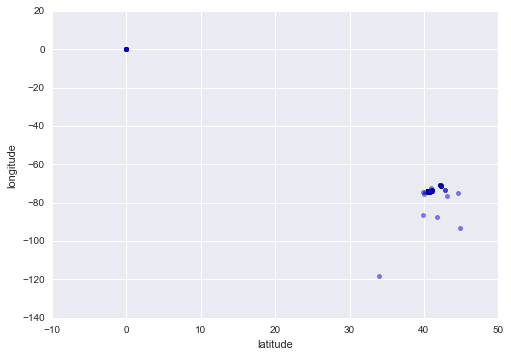

In [15]:
plt.scatter(train['latitude'], train['longitude'], alpha = 0.5)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

The latitude and longitude coordinates of new york city are 40.730610, -73.935242. Let's say we commute 150 miles along all 
directions, corresponds to ~2.4 degree in latitude and ~3 degree in longitude. That expands the lattitude to 40.73+/-2.4 and longitude to -73.94 +/- 3. Data outside of this range are outliers needed to be removed. We further narrow down our focus to simplify the problem.

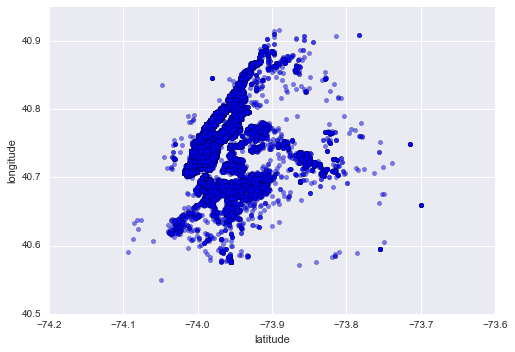

In [16]:
train = train[(train['longitude'] < -73.70) & (train['longitude'] > -74.10) & (train['latitude'] > 40.30) & 
              (train['latitude'] < 40.95)]

plt.scatter(train['longitude'], train['latitude'], c = 'b', alpha = 0.5)
plt.xlabel('latitude')
plt.ylabel('longitude')

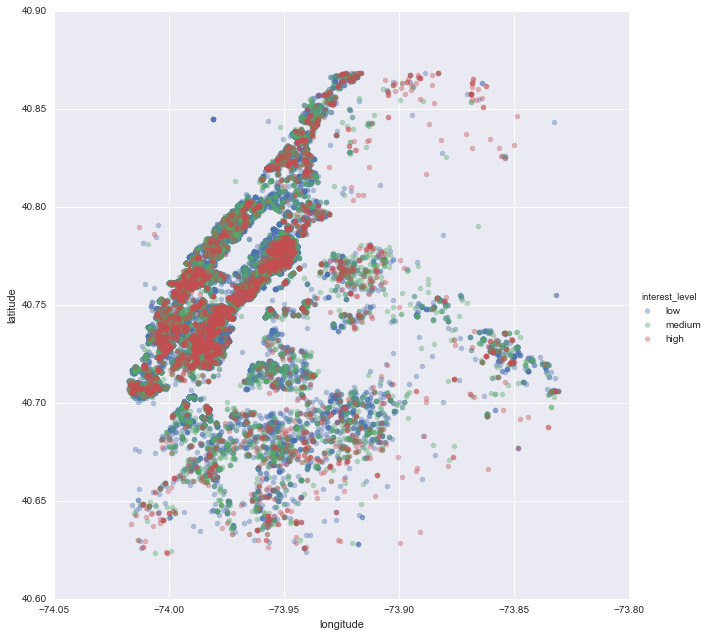

In [17]:
df = train[(train.longitude > train.longitude.quantile(0.005))
                           &(train.longitude < train.longitude.quantile(0.995))
                           &(train.latitude > train.latitude.quantile(0.005))&(train.latitude < train.latitude.quantile(0.995))]
sns.lmplot(x="longitude", y="latitude", data = df, fit_reg=False, hue='interest_level', hue_order=['low', 'medium', 'high'],
          size=9, scatter_kws={'alpha':0.4,'s':30})

#### 4. price -- delete outliers, only consider [300, 20000] range, log transform to normal distribution

In [18]:
train['price'].describe()

count    4.929100e+04
mean     3.829786e+03
std      2.207974e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

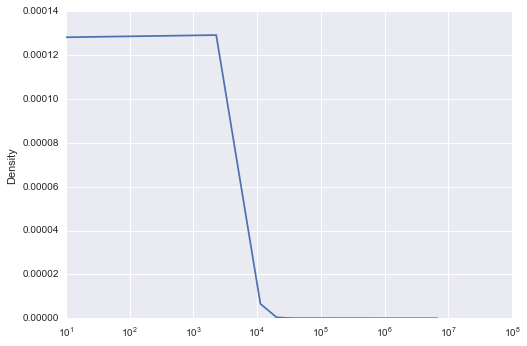

In [19]:
train['price'].plot(logx = True, logy = False, xlim = [10, 10e7], kind = 'kde')
plt.show()

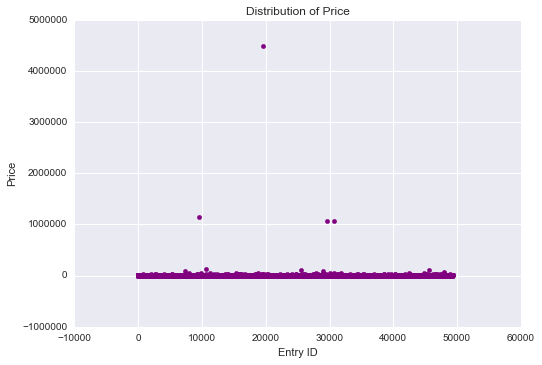

In [20]:
plt.scatter(range(train.shape[0]), train['price'].values,color='purple')
plt.title("Distribution of Price")
plt.xlabel("Entry ID")
plt.ylabel("Price")

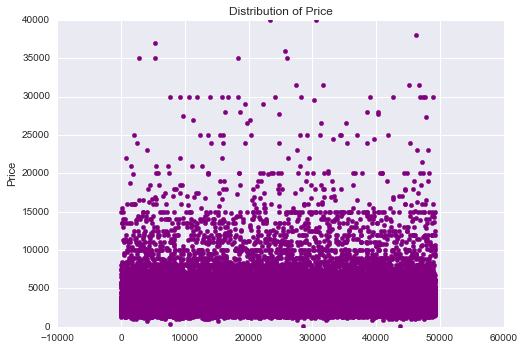

In [21]:
plt.scatter(range(train.shape[0]), train['price'].values, color = 'purple')
plt.ylim(0, 40000)
plt.ylabel('Price')
plt.title('Distribution of Price')

In [22]:
train[train['price'] > 20000]['price'].count()

107

In [23]:
train[train['price'] < 300]['price'].count()

2

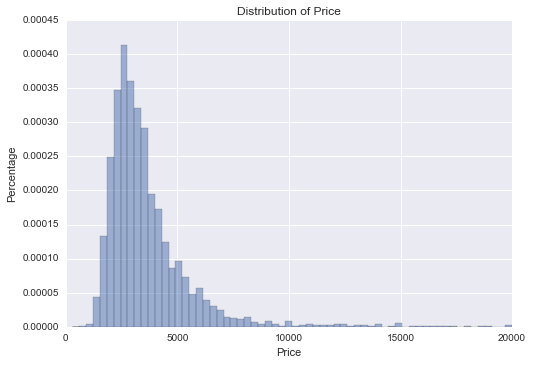

In [3]:
train['price'].hist(bins=64, range=(300, 20000), alpha = .5, normed = True)
plt.xlabel('Price')
plt.ylabel('Percentage')
plt.title('Distribution of Price')
plt.show()

The distribution of price is skewed and doesn't follow normal distribution. Log transformation may be needed to make it normal.

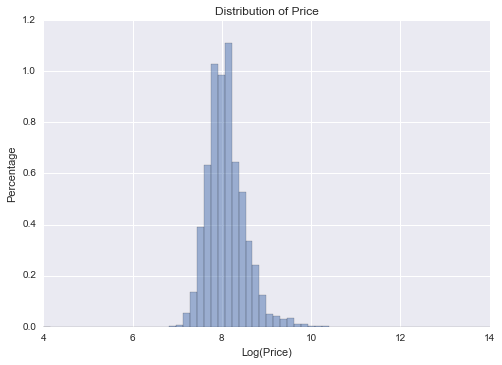

In [4]:
x = train['price'].values
plt.hist(np.log(x), bins=64, range = (4, 14), alpha = .5, normed = True)
plt.xlabel('Log(Price)')
plt.ylabel('Percentage')
plt.title('Distribution of Price')
plt.show()

In [26]:
train = train[(train['price'] >= 300) & (train['price'] <= 20000)]
train['log_price'] = train['price'].apply(np.log).copy()
train = train.set_index([[i for i in range(49182)]])

Let's see how price influence interest level.

In [6]:
price_low = train[train['interest_level']=='low']['price'].apply(np.log).values
price_medium = train[train['interest_level']=='medium']['price'].apply(np.log).values
price_high = train[train['interest_level']=='high']['price'].apply(np.log).values

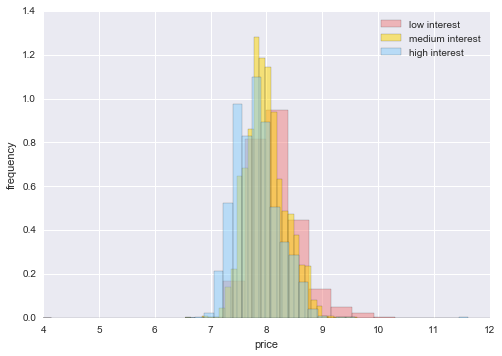

In [8]:
plt.hist(price_low, bins=30, alpha = .5, normed = True, color = 'lightcoral', label = 'low interest')
plt.hist(price_medium, bins=30, alpha = .5, normed = True, color = 'gold', label = 'medium interest')
plt.hist(price_high, bins=30, alpha = .5, normed = True, color = 'lightskyblue', label = 'high interest')
plt.xlim(4,12)
plt.xlabel('price')
plt.ylabel('frequency')
plt.legend()

In general, we can see that the interest level decreases with price. Let's compare the prices of apartments with low and high interest level statistically.

In [29]:
price_low = train[train['interest_level']=='low']['price'].values
price_medium = train[train['interest_level']=='medium']['price'].values
price_high = train[train['interest_level']=='high']['price'].values

print('Prices for apartments with low interest level: ')
print('Mean: ', np.mean(price_low))
print('Standard deviation: ', np.std(price_low))
print('Sample size: ', len(price_low))

print('Prices for apartments with high interest level: ')
print('Mean: ', np.mean(price_high))
print('Standard deviation: ', np.std(price_high))
print('Sample size: ', len(price_high))

Prices for apartments with low interest level: 
Mean:  3860.73484338
Standard deviation:  2102.68148376
Sample size:  34127
Prices for apartments with high interest level: 
Mean:  2672.76245111
Standard deviation:  1125.13078603
Sample size:  3835


Let's do ***two-sample t-test***. We have:
- H_null: mean_low = mean_high
- H_alternative: mean_low > mean_high

In [30]:
S_low_high = np.sqrt(2102.68**2/34127 + 1125.13**2/3835)
S_low_high

21.439427821238503

In [31]:
t_statistic = (3860.73 - 2672.76)/S_low_high
t_statistic

55.410527272708421

At a significance level of alpha = 0.05, for one tail test with degree of freedom 34127 + 3835 - 1 = 37961, t_critical = 1.645

t_statistic > t_critical. We have enough evidence to reject the null hypothesis and conclude that *** the price of apartments with low interest level and high interest level are statistically significant.***

Thus price is an important factor determining the interest level.

#### 5. bedrooms & bathrooms

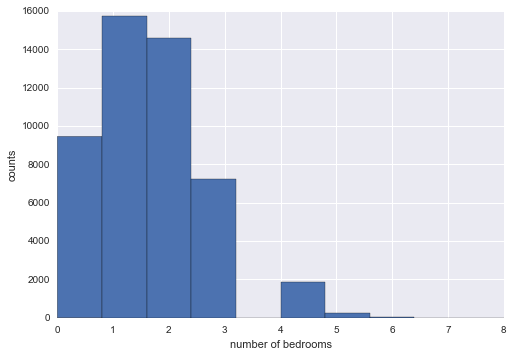

In [32]:
train['bedrooms'].hist()
plt.xlabel('number of bedrooms')
plt.ylabel('counts')

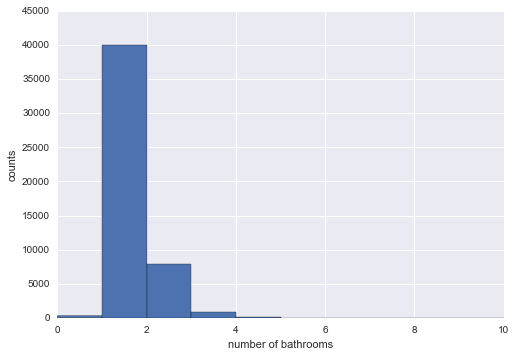

In [33]:
train['bathrooms'].hist()
plt.xlabel('number of bathrooms')
plt.ylabel('counts')

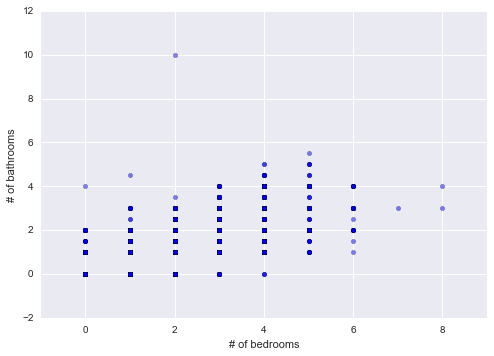

In [34]:
plt.scatter(train['bedrooms'], train['bathrooms'], alpha = 0.5)
plt.xlabel('# of bedrooms')
plt.ylabel('# of bathrooms')
plt.show()

Some apartments have both 0 bedrooms and 0 bathrooms. Let's see where they are located.

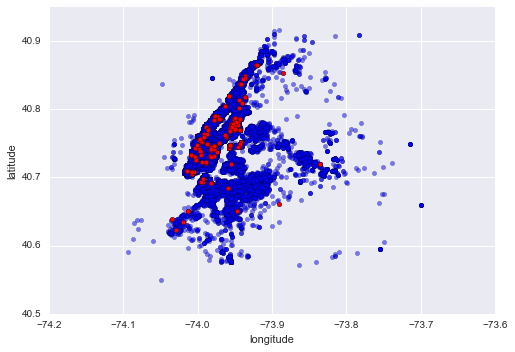

In [35]:
bed0_bath0 = train[(train['bathrooms'] == 0) & (train['bedrooms'] == 0)]
plt.scatter(train['longitude'], train['latitude'], c = 'b', alpha = 0.5)
plt.scatter(bed0_bath0['longitude'], bed0_bath0['latitude'], c = 'r')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

Most 0 bedroom and 0 bathroom apartments are located on Manhattan, which may make sense given Manhanttan is very crowded and expensive.

Let's see how number of bedrooms and bathrooms are related to the interest levels.

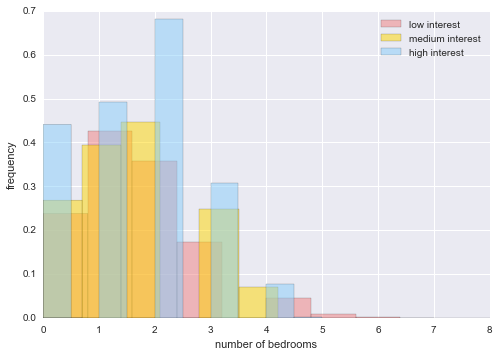

In [9]:
bedroom_low = train[train['interest_level']=='low']['bedrooms'].values
bedroom_medium = train[train['interest_level']=='medium']['bedrooms'].values
bedroom_high = train[train['interest_level']=='high']['bedrooms'].values

plt.hist(bedroom_low, alpha = .5, normed = True, color = 'lightcoral', label = 'low interest')
plt.hist(bedroom_medium, alpha = .5, normed = True, color = 'gold', label = 'medium interest')
plt.hist(bedroom_high, alpha = .5, normed = True, color = 'lightskyblue', label = 'high interest')
plt.xlabel('number of bedrooms')
plt.ylabel('frequency')
plt.legend()

The above graph is kind of messy. Let's check some numbers.

In [37]:
print('Bedroom number for apartments with low interest level: ')
print('Mean: ', np.mean(bedroom_low))
print('Standard deviation: ', np.std(bedroom_low))
print('Sample size: ', len(bedroom_low))

print('Bedroom number for apartments with medium interest level: ')
print('Mean: ', np.mean(bedroom_medium))
print('Standard deviation: ', np.std(bedroom_medium))
print('Sample size: ', len(bedroom_medium))

print('Bedroom number for apartments with high interest level: ')
print('Mean: ', np.mean(bedroom_high))
print('Standard deviation: ', np.std(bedroom_high))
print('Sample size: ', len(bedroom_high))

Bedroom number for apartments with low interest level: 
Mean:  1.50763325226
Standard deviation:  1.10409591719
Sample size:  34127
Bedroom number for apartments with medium interest level: 
Mean:  1.62290552585
Standard deviation:  1.12235084324
Sample size:  11220
Bedroom number for apartments with high interest level: 
Mean:  1.54654498044
Standard deviation:  1.11203464357
Sample size:  3835


The average values are all around 1.5 (between 1 and 2). Given that number of bedrooms can only be integer, it's hard to say 
number of bedrooms for apartments with different interest level is statistically significant.

Similarily, let's check number of bathrooms.

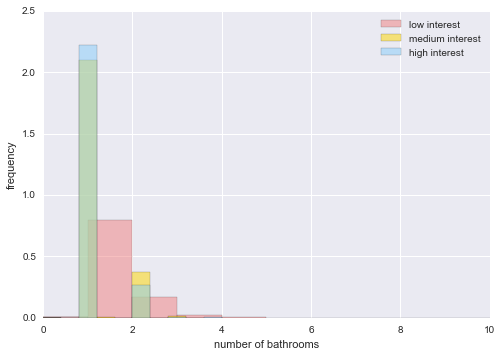

In [10]:
bathroom_low = train[train['interest_level']=='low']['bathrooms'].values
bathroom_medium = train[train['interest_level']=='medium']['bathrooms'].values
bathroom_high = train[train['interest_level']=='high']['bathrooms'].values

plt.hist(bathroom_low, alpha = .5, normed = True, color = 'lightcoral', label = 'low interest')
plt.hist(bathroom_medium, alpha = .5, normed = True, color = 'gold', label = 'medium interest')
plt.hist(bathroom_high, alpha = .5, normed = True, color = 'lightskyblue', label = 'high interest')
plt.xlabel('number of bathrooms')
plt.ylabel('frequency')
plt.legend()

In [39]:
print('Bathroom number for apartments with low interest level: ')
print('Mean: ', np.mean(bathroom_low))
print('Standard deviation: ', np.std(bathroom_low))
print('Sample size: ', len(bathroom_low))

print('Bathroom number for apartments with medium interest level: ')
print('Mean: ', np.mean(bathroom_medium))
print('Standard deviation: ', np.std(bathroom_medium))
print('Sample size: ', len(bathroom_medium))

print('Bathroom number for apartments with high interest level: ')
print('Mean: ', np.mean(bathroom_high))
print('Standard deviation: ', np.std(bathroom_high))
print('Sample size: ', len(bathroom_high))

Bathroom number for apartments with low interest level: 
Mean:  1.23006710229
Standard deviation:  0.519335690832
Sample size:  34127
Bathroom number for apartments with medium interest level: 
Mean:  1.16403743316
Standard deviation:  0.388428790791
Sample size:  11220
Bathroom number for apartments with high interest level: 
Mean:  1.11629726206
Standard deviation:  0.341837744138
Sample size:  3835


The average values are all between 1 and 2. Given that number of bathrooms can only be integer, it's hard to say 
number of bathrooms for apartments with different interest level is statistically significant.

#### 6. features -- categorize by important features

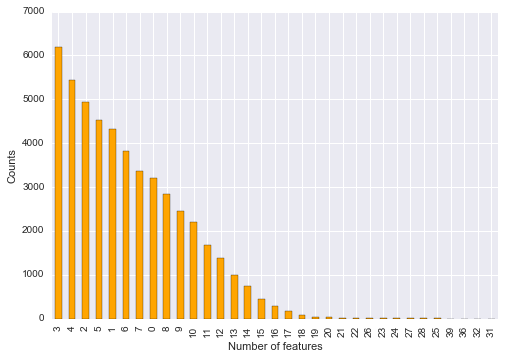

In [40]:
train['num_features'] = train['features'].apply(len)
features = train['num_features'].value_counts()
features.plot(kind='bar',color='orange')
plt.xlabel("Number of features")
plt.ylabel("Counts")

Notice that number of features doesn't follow normal distribution. Instead, their counts decrease with increasing number of features. Let's see how this is related to the interest level. Intuitively, those with larger number of features are carefully written and may have higher interest level.

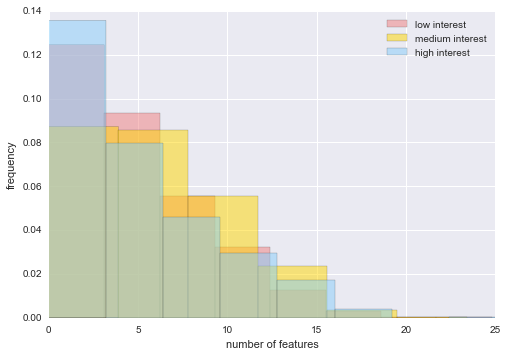

In [41]:
features_low = train[train['interest_level'] == 'low']['num_features'].values
features_medium = train[train['interest_level'] == 'medium']['num_features'].values
features_high = train[train['interest_level'] == 'high']['num_features'].values

plt.hist(features_low, alpha = .5, normed = True, color = 'lightcoral', label = 'low interest')
plt.hist(features_medium, alpha = .5, normed = True, color = 'gold', label = 'medium interest')
plt.hist(features_high, alpha = .5, normed = True, color = 'lightskyblue', label = 'high interest')
plt.xlim(0, 25)
plt.xlabel('number of features')
plt.ylabel('frequency')
plt.legend()

In [42]:
print('Number of features with low interest level: ')
print('Mean: ', np.mean(features_low))
print('Standard deviation: ', np.std(features_low))
print('Sample size: ', len(features_low))

print('Number of features with medium interest level: ')
print('Mean: ', np.mean(features_medium))
print('Standard deviation: ', np.std(features_medium))
print('Sample size: ', len(features_medium))

print('Number of features with high interest level: ')
print('Mean: ', np.mean(features_high))
print('Standard deviation: ', np.std(features_high))
print('Sample size: ', len(features_high))

Number of features with low interest level: 
Mean:  5.29867846573
Standard deviation:  3.81029080358
Sample size:  34127
Number of features with medium interest level: 
Mean:  5.89126559715
Standard deviation:  4.1084164736
Sample size:  11220
Number of features with high interest level: 
Mean:  5.16140808344
Standard deviation:  4.16726825928
Sample size:  3835


Similarily, we can do *** ANOVA test (or F test) *** to verify that the number of features for listings with low, medium, high interest level are statistically significant. 
- H_null: mean(features_low) = mean(features_medium) = mean(features_high)
- H_alternative: at least of one pair of mean is significantly different.

In [43]:
X_g = np.mean(train['num_features'])
X_g

5.423162945793177

In [44]:
X = train['num_features'].values
total = 0
for i in X:
    total += (i - X_g)**2
total

754699.13277233695

F = between-group variability / within-group variability

between-group variability = SS_between/df_between

SS_between = (34127*(mean_low - X_g)**2 + 11220*(mean_medium - X_g)**2 + 3835*(mean_high - X_g)**2)
           = (34127*(5.299 - 5.423)**2 + 11220*(5.891 - 5.423)**2 + 3835*(5.161 - 5.423)**2) = 3245.436

df_between = K - 1 = 3 - 1 = 2

within_group variability = SS_within/df_within

df_within = N - K = 34127 + 11220 + 3835 - 3 = 49179

SS_within = SS_total - SS_between = sum(X_i - X_g)**2 - 3245.436 = 754699.133 - 3245.436 = 751453.697

F = (3245.436/2)/(751453.697/49179) = 106.199 

F_critical = 3.00 at p = 0.05

F > F_critical, so at least one pair of number of features is statistically significant.

Thus, number of features may also play a big role in predicting the interest level of apartment listings.

Let's first extract important features from the training dataset.

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import itertools

vectorizer = CountVectorizer(min_df=1, stop_words = 'english')
x = vectorizer.fit_transform(itertools.chain.from_iterable(train['features']))

names = vectorizer.get_feature_names()
counts = np.sum(x.toarray(), axis=0)
n2c = list(zip(names, counts))
n2c.sort(key=lambda x: x[1], reverse=True)
print(n2c)

[('allowed', 45518), ('laundry', 29632), ('elevator', 26175), ('hardwood', 24565), ('floors', 23508), ('cats', 23475), ('dogs', 21969), ('doorman', 21065), ('dishwasher', 20763), ('building', 19280), ('fee', 18782), ('fitness', 13343), ('center', 13238), ('unit', 9796), ('war', 9180), ('pre', 9134), ('space', 7585), ('outdoor', 7215), ('deck', 7064), ('roof', 7028), ('room', 6159), ('high', 5119), ('dining', 5108), ('internet', 4308), ('speed', 4306), ('pool', 3106), ('balcony', 3097), ('swimming', 2723), ('new', 2662), ('construction', 2605), ('terrace', 2358), ('exclusive', 2155), ('garden', 2111), ('loft', 2101), ('patio', 2068), ('common', 1528), ('access', 1444), ('wheelchair', 1378), ('prewar', 1361), ('garage', 1030), ('fireplace', 941), ('simplex', 908), ('lowrise', 789), ('private', 743), ('parking', 742), ('reduced', 699), ('furnished', 687), ('level', 629), ('multi', 628), ('live', 620), ('ceilings', 615), ('site', 562), ('renovated', 531), ('super', 531), ('washer', 458), (

Let's print out some unique terms containing high frequency terms: ('laundry', 29648), ('elevator', 26134), ('hardwood', 24575), 
('cats', 23471), ('dogs', 21968), ('doorman', 21061), ('dishwasher', 20775), ('fitness', 13311).

In [47]:
import re

def uniq_term(name):
    global train
    terms = set()
    for x in train['features']:
        for phrase in x:
            phrase_lc = phrase.strip().lower()
            if re.search(name, phrase_lc):
                terms.add(phrase_lc)
        
    unique_terms = sorted(terms)
    for term in unique_terms:
        print(term)
        
uniq_term('laundry')

**laundry room code is 3401
air conditioned laundry facility
elevator & laundry
elevator/laundry/ so close to the 6 $2450!!
garage fitness facility laundry room valet lounge billiards room rooftop deck wifi access
laundry
laundry & housekeeping
laundry & housekeeping • marc club includes a cinema room
laundry / dry-cleaning and auto care
laundry facility on every floor
laundry hookup
laundry in basement
laundry in bldg
laundry in bldg.
laundry in building
laundry in building!
laundry in some units
laundry in unit
laundry on every floor
laundry on floor
laundry room
laundry room as well as housekeeping & dry-cleaning services
laundry room on every floor. health club
laundry.
on-site laundry
private laundry room on every floor
spotless laundry
valet laundry


In [48]:
uniq_term('elevator')

elevator
elevator & laundry
elevator building
elevator/laundry/ so close to the 6 $2450!!
high speed elevator
keyed elevator with direct access into your living room
rent stabilize - elevator building


In [49]:
uniq_term('hardwood')

and stainless steel appliances with a dishwasher well maintained hardwood floors add to the warmth and modern feel of the space.
boating hardwood floors
exposed brickhardwood floors microwaverenovated open view excellent
hardwood
hardwood  floors
hardwood floor
hardwood flooring
hardwood flooring throughout
hardwood floors
no fee hardwood floors
polished hardwood floors
redwood hardwood floor


In [50]:
uniq_term('cats')

* marvelous midtown gem * spacious sundrenched studio * stunning prewar details * cats ok **
** chic chelsea find! * massive 4br home * 2 full baths * chef inspired kitchen * elev that opens into apt * cats ok **
** classy conv 2br duplex dream! * room to entertain * lndry bldg * cats ok * heart of the village **
** lex ave luxury! * sprawling sunfilled 1br home * all utilities incl! * doorman * elev/lndry bldg * cats ok **
** pristine modern townhouse! * massive 2br home * chef inspired kitchen * huge windows galore * cats ok **
** super sweet 1br home * elegant e60s! * mr clean approved * chef inspired kitchen * tons of natural light! * cats ok **
** w60s wonder ~ near the park! * overszed studio steal * courtyard * free gym * elev/lndry bldg * cats ok **
cats allowed
cats on approval
pets: cats only
pets: cats/small dogs


In [51]:
uniq_term('dogs')

dogs allowed
dogs ok
dogs under 20 lbs.                parking ( additional fee)
pets: cats/small dogs
pre-war small dogs
small dogs ok


In [52]:
uniq_term('doorman')

** holy deal batman!! * oversized 3br mansion * 2 full baths * huge scenic terrace * doorman * elev/lndry bldg * roof deck * real pix **
** lex ave luxury! * sprawling sunfilled 1br home * all utilities incl! * doorman * elev/lndry bldg * cats ok **
** midtown mansion * sprawling sunfilled studio * utilities included * doorman * elev/lndry bldg * pets ok **
24 hour doorman
24 hour doorman concierge
24 hr doorman
24-hour concierge and doorman
24-hour doorman
24/7 doorman
24/7 doorman concierge
24/7 full-time doorman concierge
24hr doorman
24hr white-gloved doorman
doorman
ft doorman
full-time doorman
no fee...luxury doorman building^^^river views
part-time doorman
twenty-four hour concierge and doorman
twenty-four-hour concierge and doorman
virtual doorman
• on-site lifestyle concierge by luxury attaché •24/7 doorman • state of the art cardiovascular and weight training equipment • 24-hour valet parking garage • valet services including dry cleaning


In [53]:
uniq_term('dishwasher')

** brownstone beauty * massive 2br home * steps to the park * ss kitchen * dishwasher * oversized closets * near columbia u **
** court square gem! * lic luxury 2br home * ss kitchen ~ dishwasher * bay windows * fireplace * all new! **
** court square gem! * sprawling sundrenched 2br home * custom finishes * dishwasher * fireplaces * eat-in kitchen * bay windows **
** diamond uws deal! * massive studio * exposed brick * dishwasher * pets ok * steps to the park! **
** elegant e50s & park baby! * massive 4br mansion * no broker fee * dishwasher * walls of windows * elev bldg **
** elegant e50s!! * sprawling sundrenched 2br home * french drs * breakfast bar * dishwasher * eat-in kitchen * walk-in closets! **
** eye popping no fee! * massive 1br home * exposed brick * private terrace * dishwasher * elev bldg * roof deck * pets ok **
** holy no fee deal! * oversized 2br super share * private terrace * ss kitchen * dishwasher * elev/lndry bldg * 3 blks to l train **
** holy no fee! * oversiz

In [54]:
uniq_term('fitness')

000 sf fitness center
24/7 fitness center
a wide array of complimentary fitness classes offered weekly
concierge service. fitness center
featuring a sophisticated precor® online profile system that tracks your personal fitness goals
fitness center
fitness center and health club
fitness facility
fitness room
fully equipped fitness center with studio for classes
fully-equipped club fitness center
garage fitness facility laundry room valet lounge billiards room rooftop deck wifi access
gym fitness lounge swimming pool sun decks exercise studios indoor half-basketball court
gym/fitness
residents-only fitness center and aerobic room professionally outfitted with a full complement of strength and cardio-training equipment
state of the art fitness center
state-of-the-art cardio and fitness club
state-of-the-art fitness center
state-of-the-art fitness center and even an on-site dog run
two level fitness center


If we take a closer look at these keywords, we will notice that all keywords are terms allowed in the listings.

In [55]:
class Feature:
    def __init__(self):
        self.laundry = 0
        self.elevator = 0
        self.hardwood = 0
        self.cats = 0
        self.dogs = 0
        self.doorman = 0
        self.dishwasher = 0
        self.fitness = 0

In [56]:
features_list = []

for x in train['features']:
    f = Feature()
    features_list.append(f)
    for phrase in x:
        phrase_lc = phrase.strip().lower()
        if re.search('laundry', phrase_lc):
            f.laundry = 1
        if re.search('elevator', phrase_lc):
            f.elevator = 1
        if re.search('hardwood', phrase_lc):
            f.hardwood = 1
        if re.search('cats', phrase_lc):
            f.cats = 1
        if re.search('dogs', phrase_lc):
            f.dogs = 1
        if re.search('doorman', phrase_lc):
            f.doorman = 1
        if re.search('dishwasher', phrase_lc):
            f.dishwasher = 1
        if re.search('fitness', phrase_lc):
            f.fitness = 1

laundry_ = [f.laundry for f in features_list]  
elevator_ = [f.elevator for f in features_list]
hardwood_ = [f.hardwood for f in features_list]
cats_ = [f.cats for f in features_list]
dogs_ = [f.dogs for f in features_list]
doorman_ = [f.doorman for f in features_list]
dishwasher_ = [f.dishwasher for f in features_list]
fitness_ = [f.fitness for f in features_list]

train['laundry'] = laundry_
train['elevator'] = elevator_
train['hardwood'] = hardwood_
train['cats'] = cats_
train['dogs'] = dogs_        
train['doorman'] = doorman_        
train['dishwasher'] = dishwasher_
train['fitness'] = fitness_                   

In [57]:
train = train.drop(['features'], axis = 1)

#### 7. created -- categorize by time and date
Change 'created' timeframe into numerical values, check distribution, divide into multiple categories

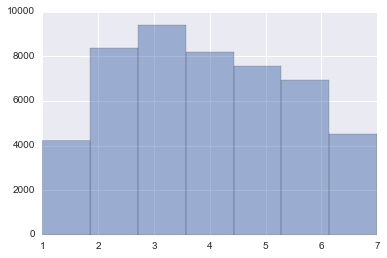

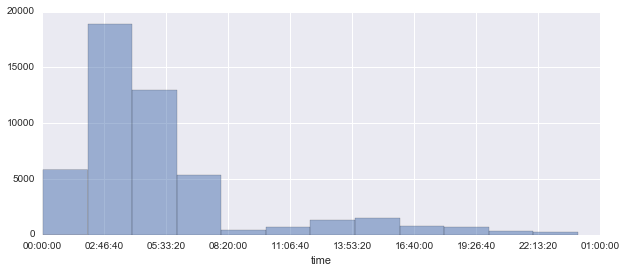

In [58]:
from datetime import time
from datetime import timezone
import datetime

times = pd.to_datetime(train['created']) # object to datetime64[ns]

train['dayofweek'] = [t.isoweekday() for t in times]
train['timeofday'] = [t.time() for t in times]

train['dayofweek'].hist(bins = 7, figsize = (6, 4), alpha = 0.5)
plt.show()

train['timeofday'].hist(bins = 12, figsize= (10, 4), alpha = 0.5) # 1-8 am most
plt.show()

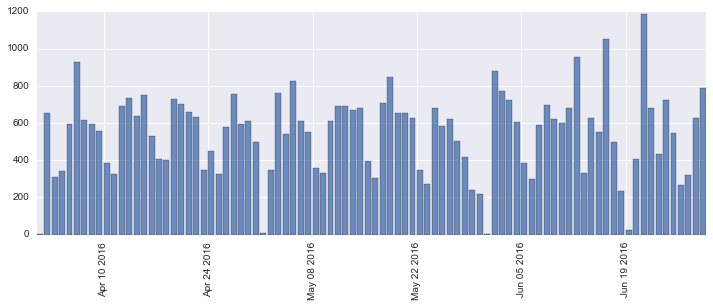

In [59]:
train["created"] = pd.to_datetime(train["created"])
train["date_created"] = train["created"].dt.date
cnt_srs = train['date_created'].value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

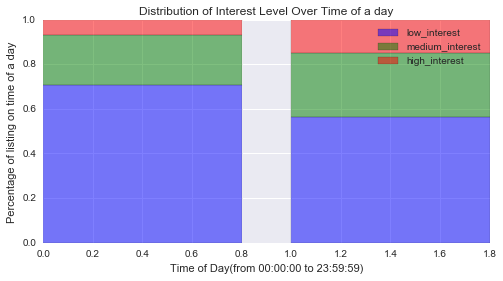

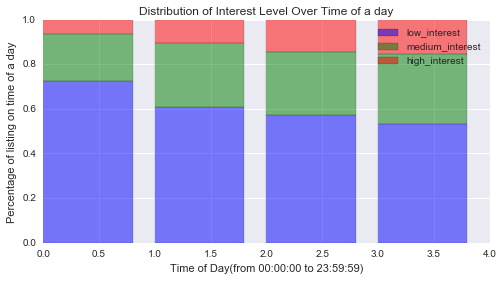

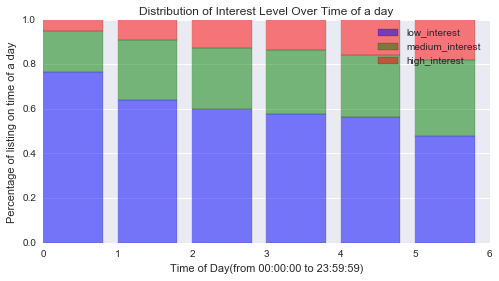

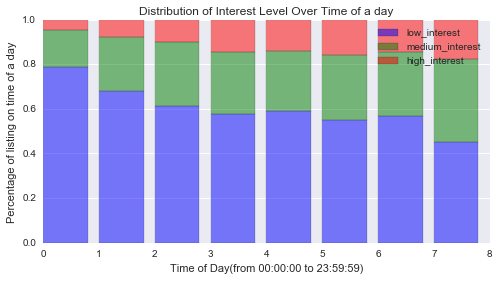

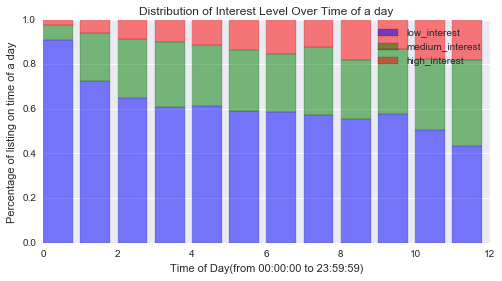

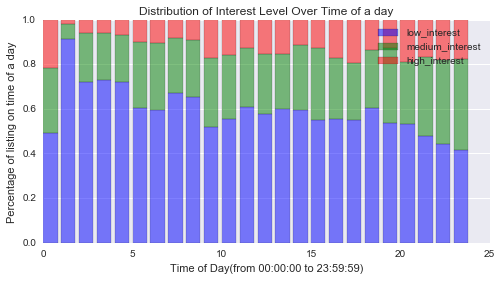

In [60]:
from datetime import datetime

slices = [2, 4, 6, 8, 12, 24]
for k in slices:
    t = []
    for i in range(k):
        temp = '5:00:00'
        temp = temp.replace('5', str(i*24//k))
        t.append(datetime.strptime(temp, '%H:%M:%S').time())
    t.append(datetime.strptime('23:59:59', '%H:%M:%S').time())

    c1, c2, c3 = [], [], []
    for i in range(k-1):
        c1.append(train[(train['timeofday'] >= t[i]) & (train['timeofday'] < t[i+1]) & (train['interest_level'] == "low")]['timeofday'].count())
        c2.append(train[(train['timeofday'] >= t[i]) & (train['timeofday'] < t[i+1]) & (train['interest_level'] == "medium")]['timeofday'].count())
        c3.append(train[(train['timeofday'] >= t[i]) & (train['timeofday'] < t[i+1]) & (train['interest_level'] == "high")]['timeofday'].count())

    c1.append(train[(train['timeofday'] >= t[k-1]) & (train['timeofday'] < t[k]) & (train['interest_level'] == 'low')]['timeofday'].count())
    c2.append(train[(train['timeofday'] >= t[k-1]) & (train['timeofday'] < t[k]) & (train['interest_level'] == 'medium')]['timeofday'].count())
    c3.append(train[(train['timeofday'] >= t[k-1]) & (train['timeofday'] < t[k]) & (train['interest_level'] == 'high')]['timeofday'].count())

    pct1, pct2, pct3 = [], [], []
    for i in range(k):
        temp1 = c1[i]/float(c1[i] + c2[i] + c3[i])
        temp2 = c2[i]/float(c1[i] + c2[i] + c3[i])
        pct1.append(temp1)
        pct2.append(temp2)
        pct3.append(1.0 - temp1 - temp2)
    
    pct_12 = [i + j for i, j in zip(pct1, pct2)]
    x = [i for i in range(k)]
    figure = plt.figure(figsize = (8, 4))
    p1 = plt.bar(x, pct1, color = 'b', alpha = 0.5)
    p2 = plt.bar(x, pct2, bottom = pct1, color = 'g', alpha = 0.5)
    p3 = plt.bar(x, pct3, bottom = pct_12, color = 'r', alpha = 0.5)
    plt.xlabel('Time of Day(from 00:00:00 to 23:59:59)')
    plt.ylabel('Percentage of listing on time of a day')
    plt.legend((p1[0], p2[0], p3[0]), ('low_interest', 'medium_interest', 'high_interest'))
    plt.title("Distribution of Interest Level Over Time of a day")
    plt.show()

Apartment rental lists posted at different time of day indeed have attracted different interest. This may be related to people's 
daily schedule/activities and energy cycles. There is no obvious pattern though. 

Let's separate Friday from the rest of the days and classify the time of day into four categories.

#### 8. photo -- matters a lot

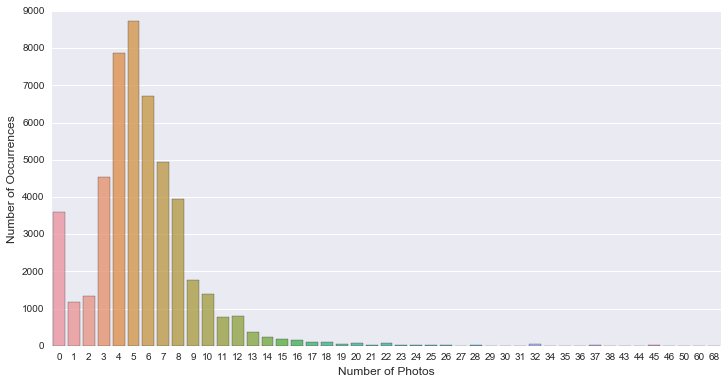

In [61]:
train["num_photos"] = train["photos"].apply(len)
cnt_srs = train['num_photos'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

Number of photos doesn't follow normal distribution. Let's plot log number of photos instead.

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


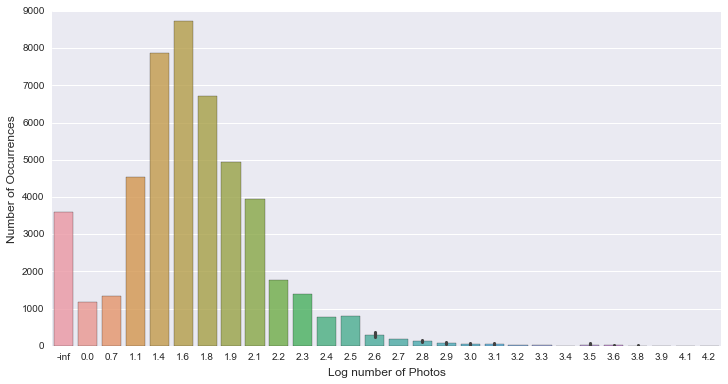

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(np.round(np.log(cnt_srs.index),1), cnt_srs.values, alpha=0.8)
plt.xlabel('Log number of Photos', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

It is closer to normal distribution. 

Plot photo_number versus interest level.

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: invalid value encountered in double_scalars


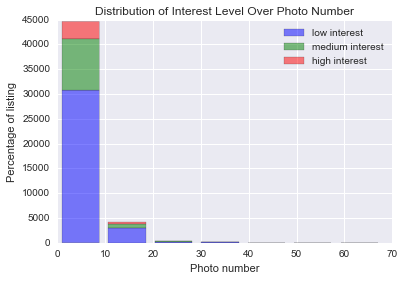

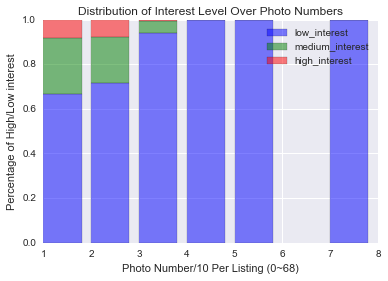

In [63]:
figure = plt.figure(figsize = (6, 4))
plt.hist([train[train['interest_level'] == 'low']['num_photos'], train[train['interest_level'] == 'medium']['num_photos'], 
         train[train['interest_level'] == 'high']['num_photos']], stacked = True, color = ['b', 'g', 'r'], bins = 7, 
         label = ['low interest', 'medium interest', 'high interest'], log = False, alpha = 0.5)
plt.xlabel('Photo number')
plt.ylabel('Percentage of listing')
plt.legend()
plt.title("Distribution of Interest Level Over Photo Number")

# stacked bar graph: Friday shows slightly higher interest compared to other days
# image > 30, no interest
y1, y2, y3 = [], [], []
for i in range(7):
    temp1 = train[(train['interest_level'] == 'low') & (train['num_photos'] > i*10) & (train['num_photos'] < (i+1)*10)]['num_photos'].count()
    temp2 = train[(train['interest_level'] == 'medium') & (train['num_photos'] > i*10) & (train['num_photos'] < (i+1)*10)]['num_photos'].count()
    temp3 = train[(train['interest_level'] == 'high') & (train['num_photos'] > i*10) & (train['num_photos'] < (i+1)*10)]['num_photos'].count()
    y1.append(temp1*1.0/(temp1 + temp2 + temp3))
    y2.append(temp2*1.0/(temp1 + temp2 + temp3))
    y3.append(temp3*1.0/(temp1 + temp2 + temp3))
        
x = [i+1 for i in range(7)]
y12 = [ i + j for (i, j) in zip(y1, y2)]

figure = plt.figure(figsize = (6, 4))
p1 = plt.bar(x, y1, color = 'b', alpha = 0.5)
p2 = plt.bar(x, y2, bottom = y1, color = 'g', alpha = 0.5)
p3 = plt.bar(x, y3, bottom = y12, color = 'r', alpha = 0.5)

plt.xlabel('Photo Number/10 Per Listing (0~68)')
plt.ylabel('Percentage of High/Low interest')
plt.legend((p1[0], p2[0], p3[0]), ('low_interest', 'medium_interest', 'high_interest'))
plt.title("Distribution of Interest Level Over Photo Numbers")
plt.show()

It is clear that the interest level is strongly correlated with the photo number of each posts. Posts with 0 ~ 20 photos has the highest percentage of attracting high interest, while posts with over 30 photos mostly attracts low interest.

#### 9. Description

In [64]:
descrip_len = []
     
for i, x in train.iterrows():
        descrip_len.append(len(x.description.strip()))
train = train.assign(description_len = descrip_len)

Plot description lens versus interest level

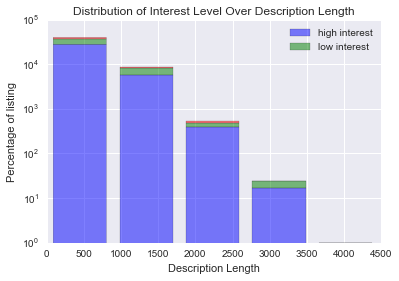

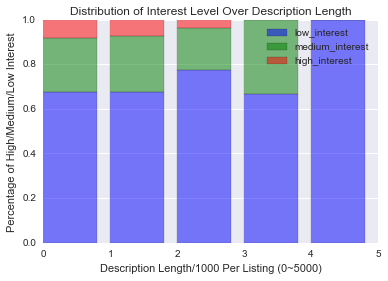

In [65]:
figure = plt.figure(figsize = (6, 4))
plt.hist([train[train['interest_level'] == 'low']['description_len'], train[train['interest_level'] == 'medium']['description_len'], 
          train[train['interest_level'] == 'high']['description_len']], stacked = True, color = ['b', 'g', 'r'], bins = 5, 
          label = ['high interest','low interest'], log = True, alpha = 0.5)
plt.xlabel('Description Length')
plt.ylabel('Percentage of listing')
plt.legend()
plt.title("Distribution of Interest Level Over Description Length")


y1, y2, y3 = [], [], []
    
for i in range(5):
    temp1 = train[(train['interest_level'] == 'low') & (train['description_len'] > i*1000) & (train['description_len'] <= (i+1)*1000)]['description_len'].count()
    temp2 = train[(train['interest_level'] == 'medium') & (train['description_len'] > i*1000) & (train['description_len'] <= (i+1)*1000)]['description_len'].count()
    temp3 = train[(train['interest_level'] == 'high') & (train['description_len'] > i*1000) & (train['description_len'] <= (i+1)*1000)]['description_len'].count()
    y1.append(temp1*1.0/(temp1 + temp2 + temp3))
    y2.append(temp2*1.0/(temp1 + temp2 + temp3))
    y3.append(temp3*1.0/(temp1 + temp2 + temp3))
        
x = [i for i in range(5)]
y12 = [i + j for i, j in zip(y1, y2)]

figure = plt.figure(figsize = (6, 4))
p1 = plt.bar(x, y1, color = 'b', alpha = 0.5)
p2 = plt.bar(x, y2, bottom = y1, color = 'g', alpha = 0.5)
p3 = plt.bar(x, y3, bottom = y12, color = 'r', alpha = 0.5)

plt.xlabel('Description Length/1000 Per Listing (0~5000)')
plt.ylabel('Percentage of High/Medium/Low Interest')
plt.legend((p1[0], p2[0], p3[0]), ('low_interest', 'medium_interest', 'high_interest'))
plt.title("Distribution of Interest Level Over Description Length")
plt.show()

The interest level also show dependence on the length of the descriptions. Description length of 0~1000 shows the highest proportion of posts that attract the highest interest level while this value decreases with increasing description length.

#### 10. Display Address

Display_address that appear less than 2 times: 63.11%
Display_address that appear less than 10 times: 89.58%
Display_address that appear less than 50 times: 97.72%
Display_address that appear less than 100 times: 99.26%
Display_address that appear less than 500 times: 100.0%


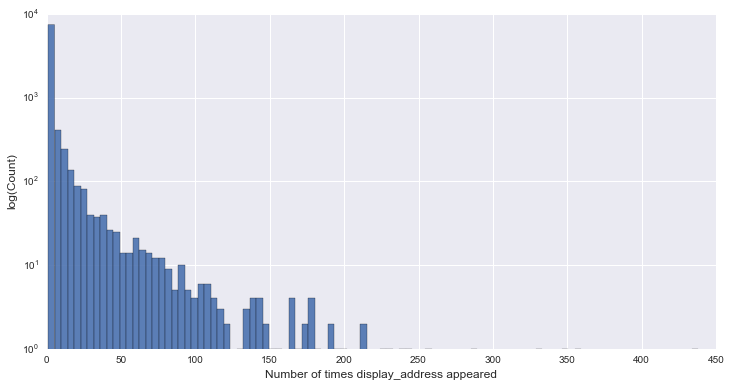

In [66]:
cnt_srs = train.groupby('display_address')['display_address'].count()

for i in [2, 10, 50, 100, 500]:
    print('Display_address that appear less than {} times: {}%'.format(i, round((cnt_srs < i).mean() * 100, 2)))

plt.figure(figsize=(12, 6))
plt.hist(cnt_srs.values, bins=100, log=True, alpha=0.9)
plt.xlabel('Number of times display_address appeared', fontsize=12)
plt.ylabel('log(Count)', fontsize=12)
plt.show()

Since this information is already represented in (longitude, lattitude), we may drop it for modeling.